# 2nd task

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import random as rnd

In [3]:
from scipy.fftpack import rfft, irfft, fft

In [4]:
# Формируем цифровой сигнал на основе случайной последовательности 0/1

def digital_signal(length, sequence):
    
    COUNTS = length // len(sequence)
    dig_sig = []
    
    for item in sequence:
        for count in range(COUNTS):
            dig_sig.append(item)
    
    return dig_sig

In [5]:
# Формируем случайную последовательность

def rand_seq(length):
    return [rnd.choice([0, 1]) for i in range(length)]

In [6]:
# Формируем гармонический модулирующий синус-сигнал

def harmonic_signal(amp, freq, length):
    t = np.linspace(0, 1, length)
    return amp * np.sin(2 * np.pi * freq * t)

In [7]:
# Модулированный сигнал (Амплитудная манипуляция)

def amplitude_shift_keying(signal, mod_sig):
    return signal * mod_sig

In [8]:
# Генерация АБГШ

def awgn(mean, std, num):
    return np.random.normal(mean, std, num)

In [9]:
# Срезающий фильтр

def noise_filter(spectrum, cutoff):
    spectrum[cutoff:] = 0
    return spectrum

1) Создаём цифровой сигнал и строим его временную диаграмму

In [10]:
signal = digital_signal(1000, rand_seq(50))

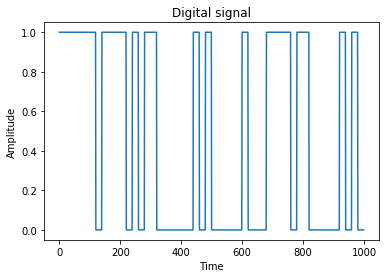

In [11]:
plt.plot(signal)

plt.title('Digital signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

2) Создаём модулирующий сигнал и строим его график

In [12]:
harm = harmonic_signal(1, 80, 1000)

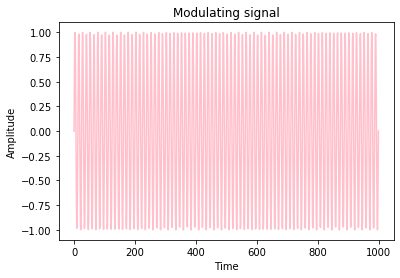

In [13]:
plt.plot(harm, color='pink')

plt.title('Modulating signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

3) Получаем Амплитудно-модулированный непрерывный сигнал и строим график

In [14]:
res = amplitude_shift_keying(signal, harm)

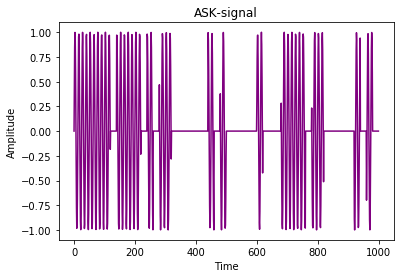

In [15]:
plt.plot(res, color='purple')

plt.title('ASK-signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

4) Строим спектр AM-сигнала и его спектрограмму (waterfall)

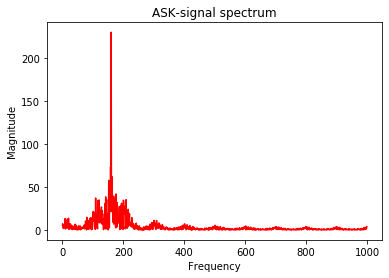

In [16]:
plt.plot(np.abs(rfft(res, 1000)), color='red')

plt.title('ASK-signal spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

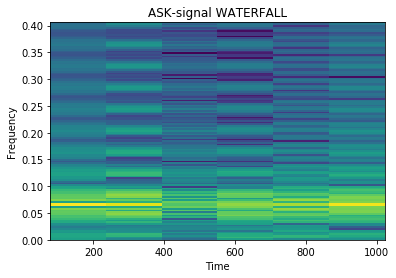

In [17]:
plt.specgram(res, Fs = 2 ** -0.3, scale_by_freq=True, scale = 'dB')

plt.title("ASK-signal WATERFALL")
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

5) Полученный АМ-сигнал передаётся по каналу связи с АБГШ. Смотрим его график и спектр

In [18]:
new_res = res + awgn(0, 0.3, 1000)

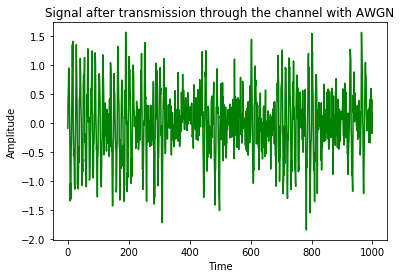

In [19]:
plt.plot(new_res, color='green')

plt.title('Signal after transmission through the channel with AWGN')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

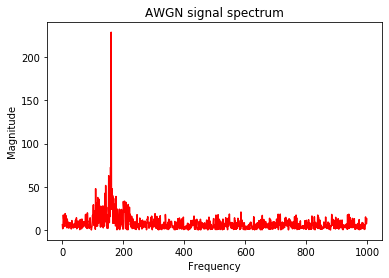

In [20]:
plt.plot(np.abs(rfft(new_res, 1000)), color='red')

plt.title('AWGN signal spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

6) Применим к сигналу фильтр и уберем паразитные шумовые частоты

In [21]:
spec = noise_filter(rfft(new_res, 1000), cutoff=350)

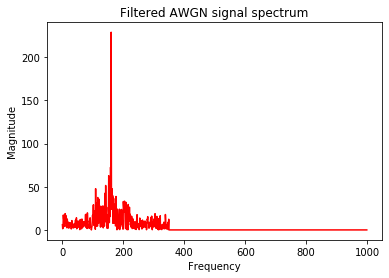

In [22]:
plt.plot(np.abs(spec), color='red')

plt.title('Filtered AWGN signal spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

7) Восстановим сигнал после его фильрации

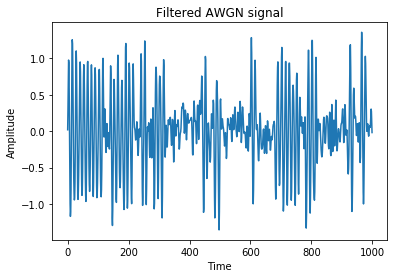

In [23]:
plt.plot(irfft(spec))

plt.title('Filtered AWGN signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()